In [1]:
import clustering_utils, analyser

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
DDL_file = "./test_parser.sql"
with open(DDL_file) as fp:
    ddl = fp.read()
results = clustering_utils.parse_ddl(ddl)
print(f"#Tables: {len(results)}")

graph = clustering_utils.get_multidigraph(results)
simple_graph = clustering_utils.get_unweighted_simple_digraph(graph)

graph_analyser = analyser.Analyser(simple_graph)
df = graph_analyser.analyse_communities()
print(df)
best_community = graph_analyser.best_community["communities"]
print(f"Best Community as per modularity: {best_community}")

expanded_community = clustering_utils.expand_communities(
    simple_graph, best_community
)
print(f"Expanded best community: {expanded_community}")

#Tables: 11
[({'`classroom`', '`student`', '`instructor`', '`teaches`', '`time_slot`', '`department`', '`takes`', '`advisor`', '`section`'}, {'`prereq`', '`course`'}), ({'`student`', '`instructor`', '`teaches`', '`department`', '`advisor`'}, {'`takes`', '`time_slot`', '`section`', '`classroom`'}, {'`prereq`', '`course`'})]
                                 algorithm  n_communities  \
0                            girvan_newman              3   
1  edge_current_flow_betweenness_partition              3   
2            greedy_modularity_communities              4   
3                     asyn_lpa_communities              3   
4            label_propogation_communities              3   
5       fast_label_propagation_communities              2   
6                              asyn_fluidc              3   

                                         communities  modularity  
0  [{`student`, `instructor`, `teaches`, `departm...    0.298817  
1  [{`student`, `instructor`, `department`, `take...

There are 3 communities
[{'`student`', '`instructor`', '`department`', '`advisor`'}, {'`classroom`', '`teaches`', '`time_slot`', '`takes`', '`section`'}, {'`prereq`', '`course`'}]


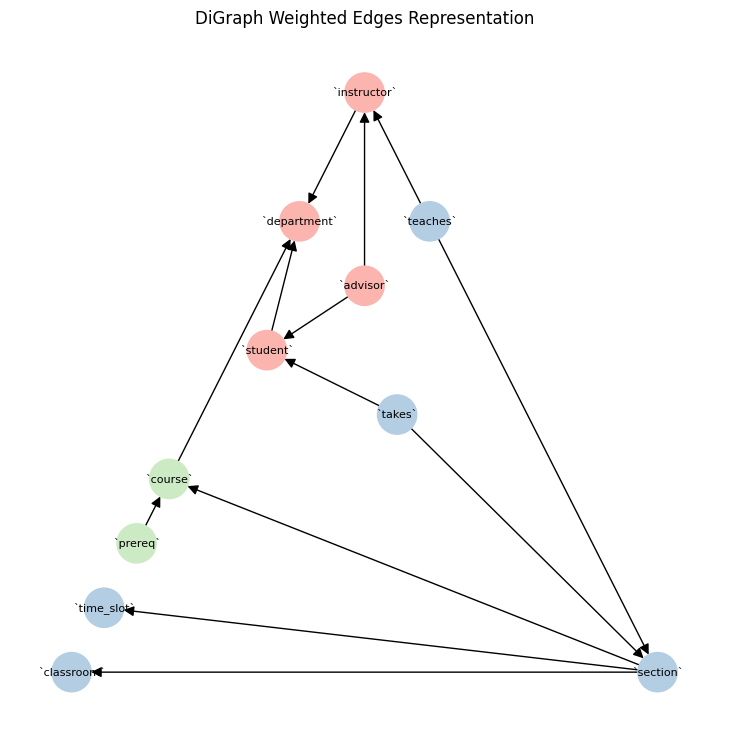

In [3]:
clustering_utils.draw_colored_planar_graph(simple_graph, best_community)

There are 3 communities
((0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432))


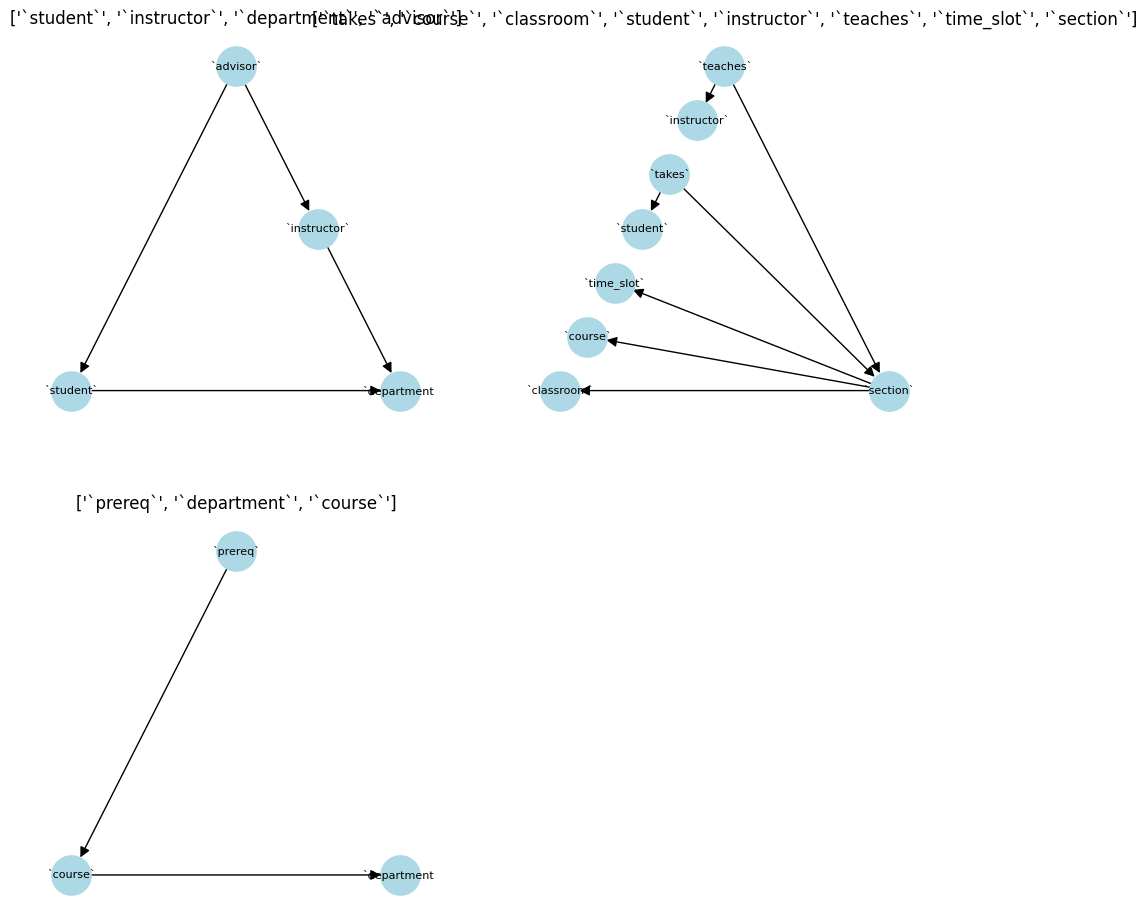

In [4]:
clustering_utils.draw_communities(simple_graph, expanded_community)


In [5]:
print(expanded_community)
community2 = simple_graph.subgraph(expanded_community[2])
c2_analyser = analyser.Analyser(community2)
c2_df = c2_analyser.analyse_communities()
print(c2_df)
c2_community = c2_analyser.best_community["communities"]
print(f"Best Community as per modularity: {c2_community}")


[{'`student`', '`instructor`', '`department`', '`advisor`'}, {'`takes`', '`course`', '`classroom`', '`student`', '`instructor`', '`teaches`', '`time_slot`', '`section`'}, {'`prereq`', '`department`', '`course`'}]
                                 algorithm  n_communities  \
0  edge_current_flow_betweenness_partition              1   
1            greedy_modularity_communities              1   
2                     asyn_lpa_communities              1   
3            label_propogation_communities              1   
4       fast_label_propagation_communities              1   
5                              asyn_fluidc              1   

                            communities  modularity  
0  [{`prereq`, `department`, `course`}]         0.0  
1  [(`prereq`, `department`, `course`)]         0.0  
2  [{`prereq`, `department`, `course`}]         0.0  
3  [{`prereq`, `department`, `course`}]         0.0  
4  [{`prereq`, `department`, `course`}]         0.0  
5  [{`prereq`, `department`, `cours